# Parson's Recreation for Individual Models

In [1]:
# Load modules

import xarray as xr
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import zarr
import gcsfs

## Loading in data

In [2]:
cat = pd.read_csv('/data/keeling/a/cristi/a/esm_data/cmip6_catalog.csv')
cat

activity_id branch_method branch_time_in_child branch_time_in_parent  \
0             CMIP      standard                  0.0                   0.0   
1             CMIP      standard                  0.0                   0.0   
2             CMIP      standard                  0.0                   0.0   
3             CMIP      standard                  0.0                   0.0   
4             CMIP      standard                  0.0                   0.0   
...            ...           ...                  ...                   ...   
11429  ScenarioMIP      standard              59400.0               59400.0   
11430  ScenarioMIP      standard              59400.0               59400.0   
11431  ScenarioMIP      standard              59400.0               59400.0   
11432  ScenarioMIP      standard              59400.0               59400.0   
11433  ScenarioMIP      standard              59400.0               59400.0   

                           experiment experiment_id frequency  \
0           abrupt quadrupling of CO2  abrupt-4xCO2       mon   
1           abrupt quadrupling of CO2  abrupt-4xCO2       mon   
2           abrupt quadrupling of CO2  abrupt-4xCO2       mon   
3           abrupt quadrupling of CO2  abrupt-4xCO2       mon   
4           abrupt quadrupling of CO2  abrupt-4xCO2       mon   
...                               ...           ...       ...   
11429  update of RCP8.5 based on SSP5        ssp585       mon   
11430  update of RCP8.5 based on SSP5        ssp585       mon   
11431  update of RCP8.5 based on SSP5        ssp585       mon   
11432  update of RCP8.5 based on SSP5        ssp585       mon   
11433  update of RCP8.5 based on SSP5        ssp585       mon   

                                                grid grid_label  \
0       native atmosphere N96 grid (144x192 latxlon)         gn   
1       native atmosphere N96 grid (144x192 latxlon)         gn   
2       native atmosphere N96 grid (144x192 latxlon)         gn   
3       native atmosphere N96 grid (144x192 latxlon)         gn   
4       native atmosphere N96 grid (144x192 latxlon)         gn   
...                                              ...        ...   
11429  Native N96 grid; 192 x 144 longitude/latitude         gn   
11430  Native N96 grid; 192 x 144 longitude/latitude         gn   
11431  Native N96 grid; 192 x 144 longitude/latitude         gn   
11432  Native N96 grid; 192 x 144 longitude/latitude         gn   
11433  Native N96 grid; 192 x 144 longitude/latitude         gn   

      institution_id  ...                              standard_name  \
0       CSIRO-ARCCSS  ...            surface_upward_latent_heat_flux   
1       CSIRO-ARCCSS  ...          surface_upward_sensible_heat_flux   
2       CSIRO-ARCCSS  ...   surface_downwelling_longwave_flux_in_air   
3       CSIRO-ARCCSS  ...     surface_upwelling_longwave_flux_in_air   
4       CSIRO-ARCCSS  ...                 toa_outgoing_longwave_flux   
...              ...  ...                                        ...   
11429           MOHC  ...  surface_downwelling_shortwave_flux_in_air   
11430           MOHC  ...                toa_incoming_shortwave_flux   
11431           MOHC  ...    surface_upwelling_shortwave_flux_in_air   
11432           MOHC  ...                toa_outgoing_shortwave_flux   
11433           MOHC  ...                            air_temperature   

                                     long_name  units vertical_levels  \
0              Surface Upward Latent Heat Flux  W m-2             1.0   
1            Surface Upward Sensible Heat Flux  W m-2             1.0   
2       Surface Downwelling Longwave Radiation  W m-2             1.0   
3         Surface Upwelling Longwave Radiation  W m-2             1.0   
4              TOA Outgoing Longwave Radiation  W m-2             1.0   
...                                        ...    ...             ...   
11429  Surface Downwelling Shortwave Radiation  W m-2             1.0   
11430         TOA Incid

## CanESM r1i1p1f1

In [3]:
path_canesm_control = cat.loc[(cat['variable_id']=='tas') &
               (cat['activity_id']=='CMIP') &
               (cat['frequency']=='mon') & 
               (cat['experiment_id'].str.contains('Control')) &
               (cat['source_id']=='CanESM5') &
               (cat['variant_label']=='r1i1p1f1')]['path'].to_list()
path_canesm_control = path_canesm_control[1:] # First two files are copies of each other
path_canesm_control

['/data/cristi/a/cristi/esm_data/cmip6/CanESM5/piControl/r1i1p1f1/tas_Amon_CanESM5_piControl_r1i1p1f1_gn_520101-620012.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/CanESM5/piControl/r1i1p1f1/tas_Amon_CanESM5_piControl_r1i1p1f1_gn_540101-560012.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/CanESM5/piControl/r1i1p1f1/tas_Amon_CanESM5_piControl_r1i1p1f1_gn_560101-580012.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/CanESM5/piControl/r1i1p1f1/tas_Amon_CanESM5_piControl_r1i1p1f1_gn_580101-600012.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/CanESM5/piControl/r1i1p1f1/tas_Amon_CanESM5_piControl_r1i1p1f1_gn_600101-620012.nc']

In [4]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

dset_list_canesm_control = []

for file in path_canesm_control:
    ds = xr.open_dataset(file)
    ds = ds.tas.interp(lat=new_lats,lon=new_lons)
    dset_list_canesm_control.append(ds)

In [5]:
canesm_control_ds = xr.concat(dset_list_canesm_control, dim='time', coords='minimal', compat='override')
canesm_control_ds

<xarray.DataArray 'tas' (time: 21600, lat: 88, lon: 179)>
array([[[248.47676926, 248.23956786, 247.99810656, ..., 249.48870117,
         249.24198279, 248.98708932],
        [248.32550863, 247.92152079, 247.57209653, ..., 250.16679686,
         249.68724792, 249.20676176],
        [247.628947  , 247.08414588, 246.63603833, ..., 250.06167812,
         249.43169963, 248.81753341],
        ...,
        [241.7883766 , 242.30465107, 242.76446638, ..., 239.50405786,
         240.05321846, 240.62731302],
        [241.79001622, 242.01869329, 242.19770795, ..., 240.53132627,
         240.89125994, 241.23692038],
        [242.0675244 , 242.18481633, 242.26122206, ..., 241.49623913,
         241.68512692, 241.84877712]],

       [[237.20443977, 236.96226686, 236.71971423, ..., 238.33340194,
         238.03154947, 237.73963945],
        [235.96643628, 235.59917477, 235.27705561, ..., 237.87394499,
         237.32810064, 236.81679501],
        [235.33627835, 234.93439938, 234.62812973, ..., 237.5660348 ,
         236.89709703, 236.29453001],
...
        [247.41363702, 247.85418111, 248.17888463, ..., 245.65264229,
         246.10198858, 246.47850499],
        [248.1347903 , 248.44609738, 248.62821766, ..., 246.82438206,
         247.12587494, 247.43223407],
        [247.5701018 , 247.71990845, 247.79713425, ..., 246.98519945,
         247.13008242, 247.26803377]],

       [[250.97594993, 250.79764525, 250.60875459, ..., 251.75837734,
         251.55481881, 251.35335232],
        [250.55657648, 250.25096906, 249.9517129 , ..., 252.01165313,
         251.61866665, 251.21224833],
        [249.7328767 , 249.39051131, 249.09542607, ..., 251.42475172,
         250.97649903, 250.51488418],
        ...,
        [235.18878813, 235.50671345, 235.70873042, ..., 233.58078648,
         233.93374419, 234.39574861],
        [233.21137808, 233.34387488, 233.46064128, ..., 232.51708631,
         232.73522962, 232.91212993],
        [233.2401387 , 233.275921  , 233.28659679, ..., 233.06343842,
         233.12681118, 233.14105115]]])
Coordinates:
    height   float64 2.0
  * time     (time) object 5201-01-16 12:00:00 ... 6200-12-16 12:00:00
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        ST+273.16, CMIP_table_comment: near-surface (usually, 2 m...
    long_name:      Near-Surface Air Temperature
    original_name:  ST
    standard_name:  air_temperature
    units:          K

In [6]:
canesm_control_mean = canesm_control_ds.rolling(time=300, center=True).mean('time') #12*25 = 300 - 25 Years
canesm_control_mean

<xarray.DataArray 'tas' (time: 21600, lat: 88, lon: 179)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
    height   float64 2.0
  * time     (time) object 5201-01-16 12:00:00 ... 6200-12-16 12:00:00
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        ST+273.16, CMIP_table_comment: near-surface (usually, 2 m...
    long_name:      Near-Surface Air Temperature
    original_name:  ST
    standard_name:  air_temperature
    units:          K

In [7]:
canesm_control = canesm_control_mean.std('time')
canesm_control.load()

<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[0.15552832, 0.15674579, 0.15764796, ..., 0.1511692 , 0.15221362,
        0.1532674 ],
       [0.17459755, 0.17653491, 0.17748681, ..., 0.16637398, 0.16841552,
        0.1703874 ],
       [0.18497969, 0.18589492, 0.18580571, ..., 0.17380175, 0.17692956,
        0.18012153],
       ...,
       [0.49845151, 0.50755712, 0.51514474, ..., 0.45042565, 0.4643295 ,
        0.47742404],
       [0.47212773, 0.4786956 , 0.48472575, ..., 0.43960511, 0.44846543,
        0.45688584],
       [0.42378882, 0.42668147, 0.42920094, ..., 0.40988109, 0.4136206 ,
        0.41715226]])
Coordinates:
    height   float64 2.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Control Interdecadal Variability (>25 yrs) - CanESM5')

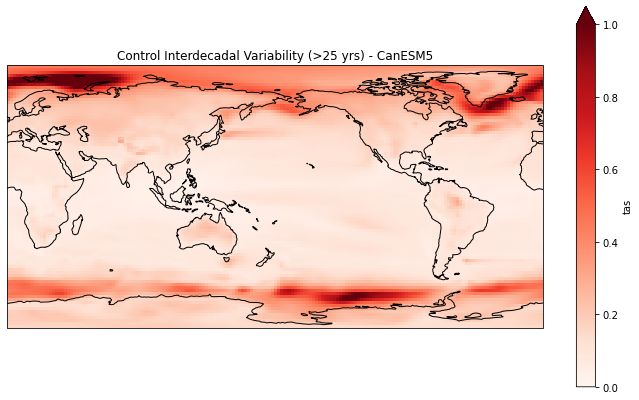

In [13]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
canesm_control.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Interdecadal Variability (>25 yrs) - CanESM5')

In [8]:
path_canesm_hist = cat.loc[(cat['variable_id']=='tas') &
               (cat['activity_id']=='CMIP') &
               (cat['frequency']=='mon') & 
               (cat['experiment_id']=='historical') &
               (cat['source_id']=='CanESM5')].head(5)['path'].to_list()
path_canesm_hist = path_canesm_hist[0]
path_canesm_hist

'/data/cristi/a/cristi/esm_data/cmip6/CanESM5/historical/r10i1p1f1/tas_Amon_CanESM5_historical_r10i1p1f1_gn_185001-201412.nc'

In [9]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

canesm_hist_ds = xr.open_dataset(path_canesm_hist)
canesm_hist_rolling = canesm_hist_ds.tas.interp(lat=new_lats,lon=new_lons).rolling(time=300, center=True).mean('time')
canesm_hist = canesm_hist_rolling.std('time')
canesm_hist.load()

<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[0.37530915, 0.37749014, 0.37955041, ..., 0.36725203, 0.36918571,
        0.37104607],
       [0.38639879, 0.39076009, 0.39459886, ..., 0.37065675, 0.3744999 ,
        0.37813753],
       [0.40105678, 0.40423769, 0.40628578, ..., 0.37965166, 0.38610095,
        0.39146933],
       ...,
       [0.87450069, 0.88141913, 0.88909864, ..., 0.82518169, 0.84110522,
        0.85507528],
       [0.85026499, 0.85664449, 0.86182023, ..., 0.81215791, 0.82357141,
        0.83399049],
       [0.73191763, 0.73420342, 0.7358034 , ..., 0.7172176 , 0.7215322 ,
        0.72553054]])
Coordinates:
    height   float64 2.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Historical Interdecadal Variability (>25 yrs) - CanESM5')

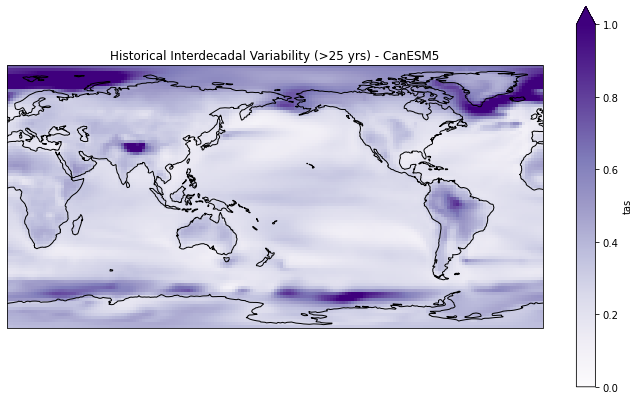

In [12]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
canesm_hist.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', vmin=0, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Historical Interdecadal Variability (>25 yrs) - CanESM5')

In [12]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

activity_id institution_id     source_id       experiment_id member_id  \
0  HighResMIP           CMCC  CMCC-CM2-HR4  highresSST-present  r1i1p1f1   
1  HighResMIP           CMCC  CMCC-CM2-HR4  highresSST-present  r1i1p1f1   
2  HighResMIP           CMCC  CMCC-CM2-HR4  highresSST-present  r1i1p1f1   
3  HighResMIP           CMCC  CMCC-CM2-HR4  highresSST-present  r1i1p1f1   
4  HighResMIP           CMCC  CMCC-CM2-HR4  highresSST-present  r1i1p1f1   

  table_id variable_id grid_label  \
0     Amon          ps         gn   
1     Amon        rsds         gn   
2     Amon        rlus         gn   
3     Amon        rlds         gn   
4     Amon         psl         gn   

                                              zstore  dcpp_init_year   version  
0  gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN  20170706  
1  gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN  20170706  
2  gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN  20170706  
3  gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN  20170706  
4  gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN  20170706

In [16]:
df_canesm_vert = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'wap' & experiment_id == 'historical' & source_id=='CanESM5'")
df_canesm_vert 

activity_id institution_id source_id experiment_id  member_id table_id  \
79626         CMIP          CCCma   CanESM5    historical  r11i1p1f1     Amon   
79858         CMIP          CCCma   CanESM5    historical  r10i1p2f1     Amon   
79953         CMIP          CCCma   CanESM5    historical  r11i1p2f1     Amon   
80102         CMIP          CCCma   CanESM5    historical  r13i1p1f1     Amon   
80273         CMIP          CCCma   CanESM5    historical  r13i1p2f1     Amon   
...            ...            ...       ...           ...        ...      ...   
107427        CMIP          CCCma   CanESM5    historical  r16i1p2f1     Amon   
107731        CMIP          CCCma   CanESM5    historical  r32i1p2f1     Amon   
107765        CMIP          CCCma   CanESM5    historical  r31i1p2f1     Amon   
142376        CMIP          CCCma   CanESM5    historical   r6i1p2f1     Amon   
142404        CMIP          CCCma   CanESM5    historical   r6i1p1f1     Amon   

       variable_id grid_label  \
79626          wap         gn   
79858          wap         gn   
79953          wap         gn   
80102          wap         gn   
80273          wap         gn   
...            ...        ...   
107427         wap         gn   
107731         wap         gn   
107765         wap         gn   
142376         wap         gn   
142404         wap         gn   

                                                   zstore  dcpp_init_year  \
79626   gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...             NaN   
79858   gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...             NaN   
79953   gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...             NaN   
80102   gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...             NaN   
80273   gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...             NaN   
...                                                   ...             ...   
107427  gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...             NaN   
107731  gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...             NaN   
107765  gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...             NaN   
142376  gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...             NaN   
142404  gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...             NaN   

         version  
79626   20190429  
79858   20190429  
79953   20190429  
80102   20190429  
80273   20190429  
...          ...  
107427  20190429  
107731  20190429  
107765  20190429  
142376  20190429  
142404  20190429  

[65 rows x 11 columns]

In [30]:
# Regridding
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

gcs = gcsfs.GCSFileSystem(token='anon')
zstore = df_canesm_vert.zstore.values[1]
mapper = gcs.get_mapper(zstore)
ds_wap_canesm = xr.open_zarr(mapper, consolidated=True)
slice_wap = ds_wap_canesm.wap.sel(time=slice('1976','2006')).sel(plev=50000,method='nearest').interp(lat=new_lats,lon=new_lons)
wap_canesm = slice_wap.mean('time')
wap_canesm

<xarray.DataArray 'wap' (lat: 88, lon: 179)>
dask.array<mean_agg-aggregate, shape=(88, 179), dtype=float32, chunksize=(88, 179), chunktype=numpy.ndarray>
Coordinates:
    plev     float64 5e+04
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Change in Interdecadal Variability (>25 yrs) - CanESM5')

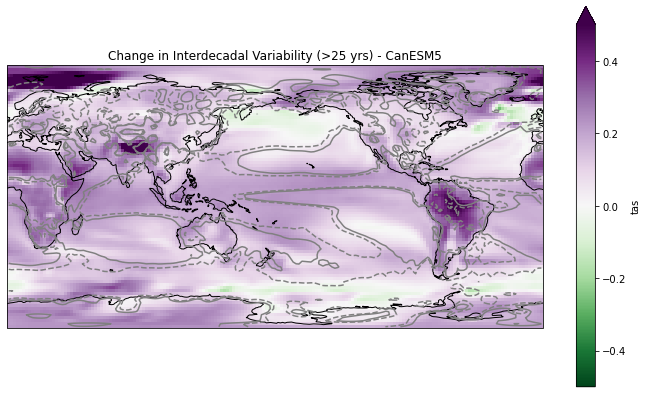

In [31]:
delta_canesm = canesm_hist - canesm_control

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
delta_canesm.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-0.5, vmax=0.5)
wap_canesm.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.coastlines(color='black', linewidth=1)
plt.title('Change in Interdecadal Variability (>25 yrs) - CanESM5')

Text(0.5, 1.0, 'Percent Change in Interdecadal Variability (>25 yrs) - CanESM5')

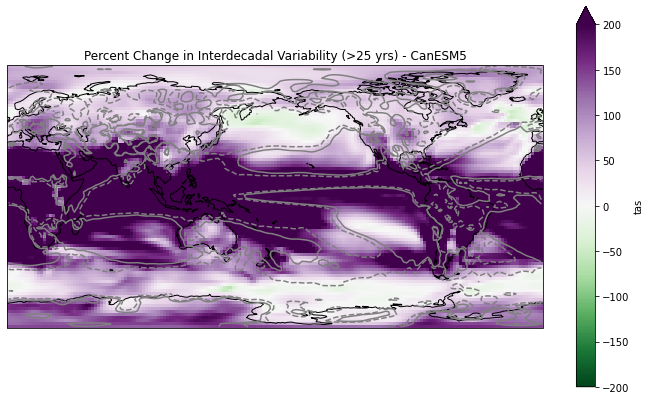

In [32]:
percent_canesm = ((delta_canesm)/canesm_control)*100

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_canesm.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-200, vmax=200)
wap_canesm.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.coastlines(color='black', linewidth=1)
plt.title('Percent Change in Interdecadal Variability (>25 yrs) - CanESM5')

In [33]:
colored_lats = []
for latitude in wap_canesm['lat'].values:
    for i in range(179): #length of longitude
       colored_lats.append(latitude)
print(len(colored_lats))

15752


Text(0, 0.5, 'Percentage Change in variability')

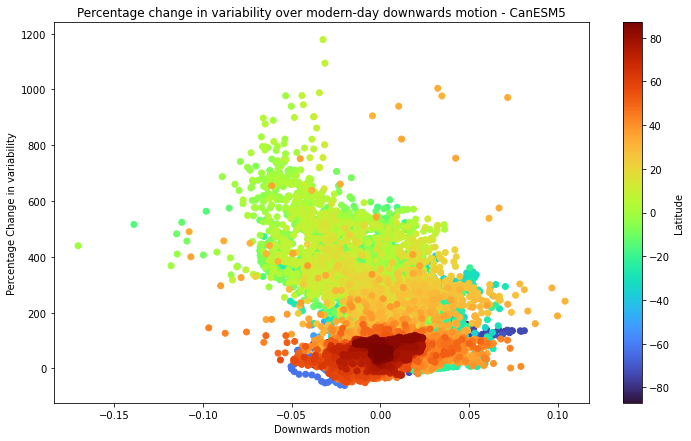

In [93]:
plt.scatter(wap_canesm,percent_canesm,c=colored_lats,cmap='turbo')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.title('Percentage change in variability over modern-day downwards motion - CanESM5')
plt.xlabel('Downwards motion')
plt.ylabel('Percentage Change in variability')

(-0.1, 0.1)

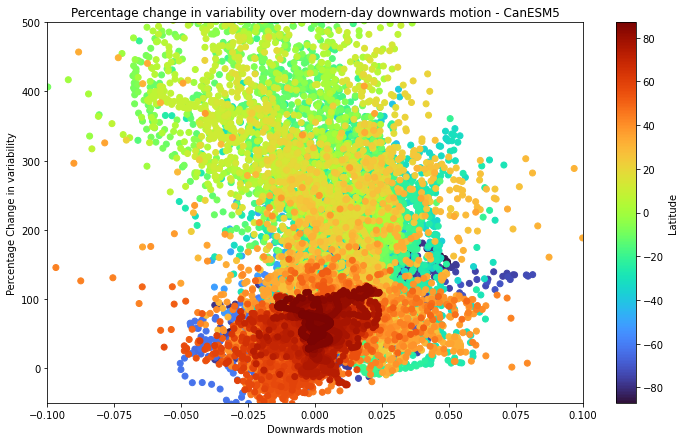

In [83]:
plt.scatter(wap_canesm,percent_canesm,c=colored_lats,cmap='turbo')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.title('Percentage change in variability over modern-day downwards motion - CanESM5')
plt.xlabel('Downwards motion')
plt.ylabel('Percentage Change in variability')
plt.ylim([-50,500])
plt.xlim([-0.1,0.1])

# E3SM

In [36]:
path_e3sm_control = cat.loc[(cat['variable_id']=='tas') &
               (cat['activity_id']=='CMIP') &
               (cat['frequency']=='mon') & 
               (cat['experiment_id'].str.contains('Control')) &
               (cat['source_id']=='E3SM-1-1')]['path'].to_list()
path_e3sm_control = path_e3sm_control[0]
path_e3sm_control

'/data/cristi/a/cristi/esm_data/cmip6/E3SM-1-1/piControl/r1i1p1f1/tas_Amon_E3SM-1-1_piControl_r1i1p1f1_gr_185001-201412.nc'

In [37]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

e3sm_control_ds = xr.open_dataset(path_e3sm_control)
e3sm_control_rolling = e3sm_control_ds.tas.interp(lat=new_lats,lon=new_lons).rolling(time=300, center=True).mean('time')
e3sm_control = e3sm_control_rolling.std('time')
e3sm_control.load()

<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[0.09229749, 0.09260123, 0.0967522 , ..., 0.1019979 , 0.09625332,
        0.09251781],
       [0.11080817, 0.11377855, 0.12124657, ..., 0.10951535, 0.10990275,
        0.10847033],
       [0.14677273, 0.14893986, 0.14831939, ..., 0.1395528 , 0.1395508 ,
        0.13954617],
       ...,
       [0.35174552, 0.37417799, 0.3750302 , ..., 0.3161698 , 0.31643497,
        0.31806898],
       [0.32889416, 0.33754805, 0.34503926, ..., 0.30352732, 0.30362321,
        0.31379602],
       [0.31198229, 0.31226329, 0.31936426, ..., 0.29172889, 0.29929287,
        0.31134303]])
Coordinates:
    height   float64 2.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Control Interdecadal Variability (>25 yrs) - E3SM1.1')

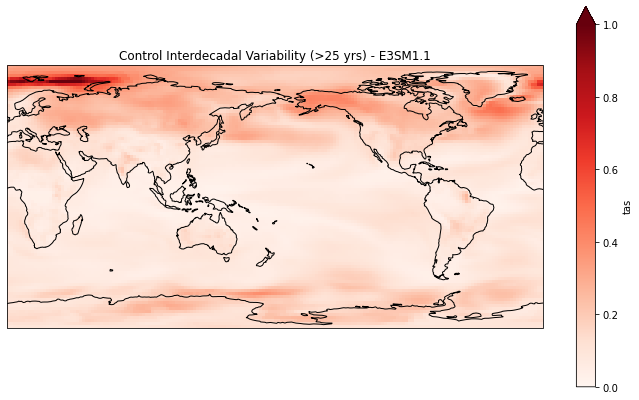

In [23]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
e3sm_control.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Interdecadal Variability (>25 yrs) - E3SM1.1')

In [38]:
path_e3sm_hist = cat.loc[(cat['variable_id']=='tas') &
               (cat['activity_id']=='CMIP') &
               (cat['frequency']=='mon') & 
               (cat['experiment_id']=='historical') &
               (cat['source_id']=='E3SM-1-1')].head(5)['path'].to_list()
path_e3sm_hist = path_e3sm_hist[0]
path_e3sm_hist

'/data/cristi/a/cristi/esm_data/cmip6/E3SM-1-1/historical/r1i1p1f1/tas_Amon_E3SM-1-1_historical_r1i1p1f1_gr_185001-201412.nc'

In [39]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

e3sm_hist_ds = xr.open_dataset(path_e3sm_hist)
e3sm_hist_rolling = e3sm_hist_ds.tas.interp(lat=new_lats,lon=new_lons).rolling(time=300, center=True).mean('time')
e3sm_hist = e3sm_hist_rolling.std('time')
e3sm_hist.load()

<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[0.25215653, 0.25214295, 0.25128382, ..., 0.25933497, 0.25383384,
        0.25216033],
       [0.24483879, 0.24828946, 0.25140895, ..., 0.22744169, 0.22720367,
        0.23317353],
       [0.24710458, 0.25685246, 0.25681332, ..., 0.22348639, 0.22346312,
        0.22444401],
       ...,
       [0.52018171, 0.53631421, 0.5367792 , ..., 0.50045281, 0.50025879,
        0.50086927],
       [0.52013898, 0.52117245, 0.52182011, ..., 0.5106921 , 0.51063271,
        0.51431904],
       [0.52064242, 0.52055266, 0.51836747, ..., 0.51448525, 0.51642753,
        0.52042744]])
Coordinates:
    height   float64 2.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Historical Interdecadal Variability (>25 yrs) - E3SM')

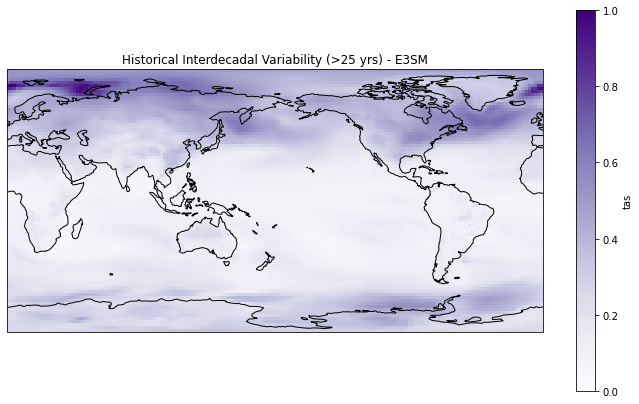

In [28]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
e3sm_hist.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', vmin=0, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Historical Interdecadal Variability (>25 yrs) - E3SM')

In [41]:
df_e3sm_vert = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'wap' & experiment_id == 'historical' & source_id=='E3SM-1-1'")
df_e3sm_vert.head() 

activity_id institution_id source_id experiment_id member_id table_id  \
522810        CMIP   E3SM-Project  E3SM-1-1    historical  r1i1p1f1     Amon   

       variable_id grid_label  \
522810         wap         gr   

                                                   zstore  dcpp_init_year  \
522810  gs://cmip6/CMIP6/CMIP/E3SM-Project/E3SM-1-1/hi...             NaN   

         version  
522810  20210805

In [43]:
# Regridding
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

gcs = gcsfs.GCSFileSystem(token='anon')
zstore = df_e3sm_vert.zstore.values[0]
mapper = gcs.get_mapper(zstore)
ds_wap_e3sm = xr.open_zarr(mapper, consolidated=True)
slice_wap = ds_wap_e3sm.wap.sel(time=slice('1976','2006')).sel(plev=50000,method='nearest').interp(lat=new_lats,lon=new_lons)
wap_e3sm = slice_wap.mean('time')
wap_e3sm.load()

<xarray.DataArray 'wap' (lat: 88, lon: 179)>
array([[ 0.01944461,  0.01926778,  0.01588045, ...,  0.0220186 ,
         0.0205769 ,  0.01945939],
       [ 0.02540817,  0.0204287 ,  0.01673158, ...,  0.0207946 ,
         0.02077024,  0.02235008],
       [ 0.02527781,  0.01538865,  0.01495439, ...,  0.01684283,
         0.0168115 ,  0.01722277],
       ...,
       [ 0.00329004, -0.00068815, -0.00081203, ..., -0.00210271,
        -0.00213267, -0.00195194],
       [ 0.00199448,  0.00145599,  0.00116448, ...,  0.0003704 ,
         0.00035414,  0.00098713],
       [ 0.00182823,  0.00182136,  0.00175626, ...,  0.00127326,
         0.00136086,  0.00180611]], dtype=float32)
Coordinates:
    plev     float64 5e+04
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Change in Interdecadal Variability (>25 yrs) - E3SM')

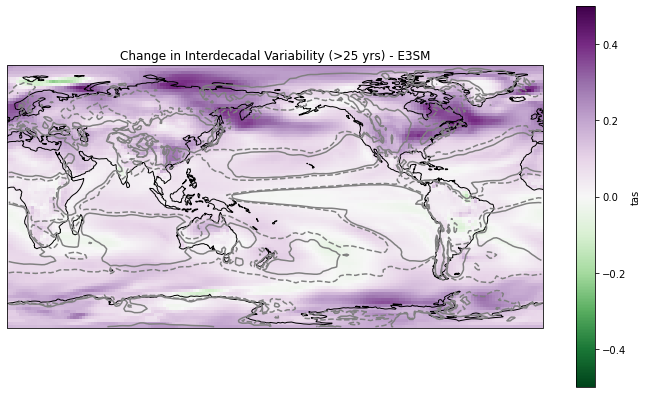

In [44]:
delta_e3sm = e3sm_hist - e3sm_control

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
delta_e3sm.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-0.5, vmax=0.5)
wap_e3sm.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.coastlines(color='black', linewidth=1)
plt.title('Change in Interdecadal Variability (>25 yrs) - E3SM')

Text(0.5, 1.0, 'Percent Change in Interdecadal Variability (>25 yrs) - E3SM')

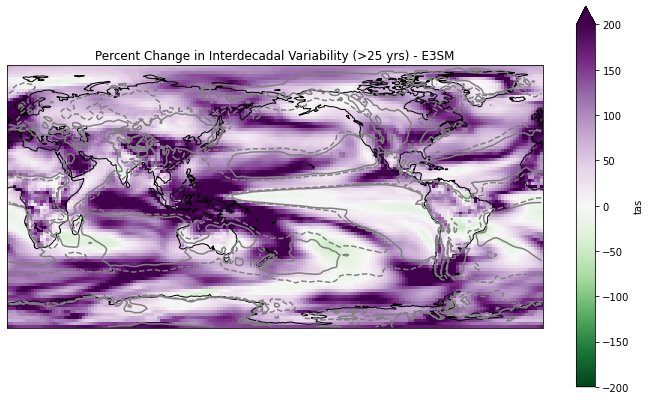

In [45]:
percent_e3sm = ((delta_e3sm)/e3sm_control)*100

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_e3sm.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-200, vmax=200)
wap_e3sm.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.coastlines(color='black', linewidth=1)
plt.title('Percent Change in Interdecadal Variability (>25 yrs) - E3SM')

Text(0, 0.5, 'Percentage Change in variability')

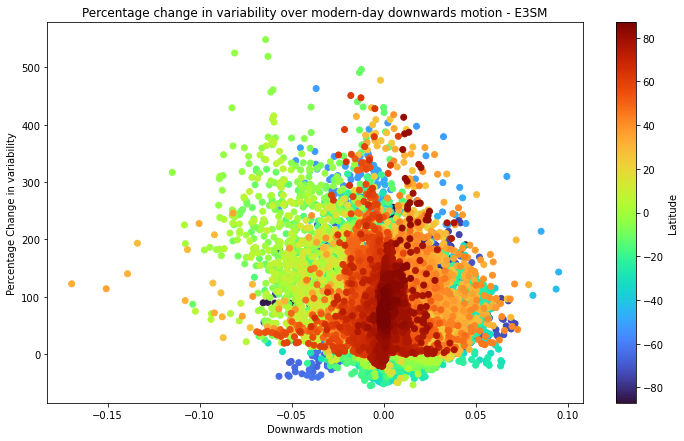

In [92]:
plt.scatter(wap_e3sm,percent_e3sm,c=colored_lats,cmap='turbo')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.title('Percentage change in variability over modern-day downwards motion - E3SM')
plt.xlabel('Downwards motion')
plt.ylabel('Percentage Change in variability')

(-0.1, 0.1)

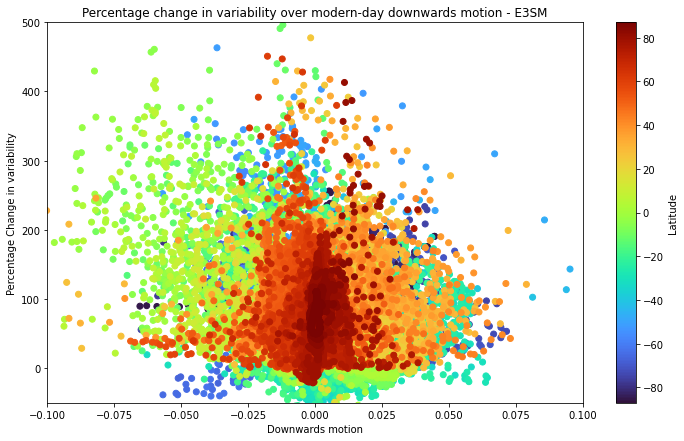

In [84]:
plt.scatter(wap_e3sm,percent_e3sm,c=colored_lats,cmap='turbo')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.title('Percentage change in variability over modern-day downwards motion - E3SM')
plt.xlabel('Downwards motion')
plt.ylabel('Percentage Change in variability')
plt.ylim([-50,500])
plt.xlim([-0.1,0.1])

# HADGEM3-GC31-LL

In [47]:
path_hadgem_control = cat.loc[(cat['variable_id']=='tas') &
               (cat['activity_id']=='CMIP') &
               (cat['frequency']=='mon') & 
               (cat['experiment_id'].str.contains('Control')) &
               (cat['source_id']=='HadGEM3-GC31-LL') &
               (cat['variant_label']=='r1i1p1f1')]['path'].to_list()
path_hadgem_control = path_hadgem_control[0]
path_hadgem_control

'/data/cristi/a/cristi/esm_data/cmip6/HadGEM3-GC31-LL/piControl/r1i1p1f1/tas_Amon_HadGEM3-GC31-LL_piControl_r1i1p1f1_gn_185001-234912.nc'

In [48]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

hadgem_control_ds = xr.open_dataset(path_hadgem_control)
hadgem_control_rolling = hadgem_control_ds.tas.interp(lat=new_lats,lon=new_lons).rolling(time=300, center=True).mean('time')
hadgem_control = hadgem_control_rolling.std('time')
hadgem_control.load()

<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[0.16757184, 0.16771576, 0.167549  , ..., 0.16728384, 0.16721954,
        0.16746031],
       [0.19179253, 0.19238153, 0.19239972, ..., 0.18960928, 0.19026609,
        0.19058295],
       [0.21344207, 0.21424786, 0.21404166, ..., 0.21245499, 0.21349071,
        0.21389683],
       ...,
       [0.35802294, 0.36889581, 0.38003419, ..., 0.31975352, 0.3295483 ,
        0.33894276],
       [0.322008  , 0.32747905, 0.33348274, ..., 0.30168951, 0.30651787,
        0.31144651],
       [0.28904896, 0.29095852, 0.29258804, ..., 0.28270786, 0.28399227,
        0.28545324]])
Coordinates:
    height   float64 1.5
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Control Interdecadal Variability (>25 yrs) - HadGEM3')

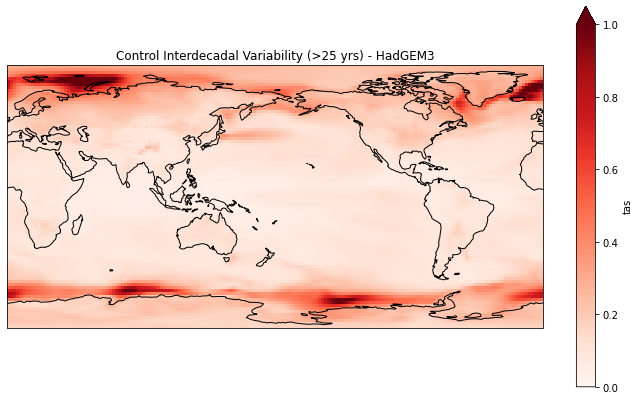

In [35]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
hadgem_control.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Interdecadal Variability (>25 yrs) - HadGEM3')

In [49]:
path_hadgem_hist = cat.loc[(cat['variable_id']=='tas') &
               (cat['activity_id']=='CMIP') &
               (cat['frequency']=='mon') & 
               (cat['experiment_id']=='historical') &
               (cat['source_id']=='HadGEM3-GC31-LL')].head(5)['path'].to_list()
path_hadgem_hist = path_hadgem_hist[0]
path_hadgem_hist

'/data/cristi/a/cristi/esm_data/cmip6/HadGEM3-GC31-LL/historical/r1i1p1f3/tas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_185001-201412.nc'

In [50]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

hadgem_hist_ds = xr.open_dataset(path_hadgem_hist)
hadgem_hist_rolling = hadgem_hist_ds.tas.interp(lat=new_lats,lon=new_lons).rolling(time=300, center=True).mean('time')
hadgem_hist = hadgem_hist_rolling.std('time')
hadgem_hist.load()

<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[0.224178  , 0.22402412, 0.22339066, ..., 0.22460491, 0.22469039,
        0.22440882],
       [0.25658339, 0.25693723, 0.25721406, ..., 0.25512095, 0.25537669,
        0.25608543],
       [0.29340489, 0.29303966, 0.29353263, ..., 0.29083861, 0.29055056,
        0.29044641],
       ...,
       [0.46706688, 0.47734904, 0.48654114, ..., 0.4047836 , 0.42126466,
        0.43876599],
       [0.43078612, 0.43679202, 0.44152086, ..., 0.40319759, 0.41049291,
        0.41741797],
       [0.39385021, 0.39645034, 0.39873575, ..., 0.38230005, 0.38489297,
        0.38756402]])
Coordinates:
    height   float64 1.5
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Historical Interdecadal Variability (>25 yrs) - HadGEM3')

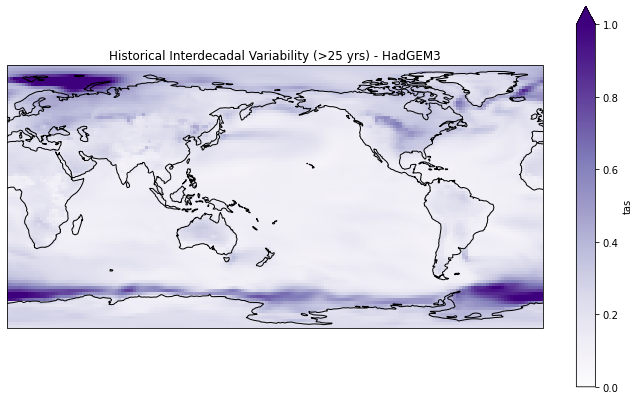

In [39]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
hadgem_hist.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', vmin=0, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Historical Interdecadal Variability (>25 yrs) - HadGEM3')

In [51]:
df_hadgem_vert = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'wap' & experiment_id == 'historical' & source_id=='HadGEM3-GC31-LL'")
df_hadgem_vert.head() 

activity_id institution_id        source_id experiment_id member_id  \
209672        CMIP           MOHC  HadGEM3-GC31-LL    historical  r4i1p1f3   
209863        CMIP           MOHC  HadGEM3-GC31-LL    historical  r2i1p1f3   
210160        CMIP           MOHC  HadGEM3-GC31-LL    historical  r1i1p1f3   
210606        CMIP           MOHC  HadGEM3-GC31-LL    historical  r3i1p1f3   
515546        CMIP           MOHC  HadGEM3-GC31-LL    historical  r5i1p1f3   

       table_id variable_id grid_label  \
209672     Amon         wap         gn   
209863     Amon         wap         gn   
210160     Amon         wap         gn   
210606     Amon         wap         gn   
515546     Amon         wap         gn   

                                                   zstore  dcpp_init_year  \
209672  gs://cmip6/CMIP6/CMIP/MOHC/HadGEM3-GC31-LL/his...             NaN   
209863  gs://cmip6/CMIP6/CMIP/MOHC/HadGEM3-GC31-LL/his...             NaN   
210160  gs://cmip6/CMIP6/CMIP/MOHC/HadGEM3-GC31-LL/his...             NaN   
210606  gs://cmip6/CMIP6/CMIP/MOHC/HadGEM3-GC31-LL/his...             NaN   
515546  gs://cmip6/CMIP6/CMIP/MOHC/HadGEM3-GC31-LL/his...             NaN   

         version  
209672  20190624  
209863  20190624  
210160  20190624  
210606  20190626  
515546  20210315

In [53]:
# Regridding
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

gcs = gcsfs.GCSFileSystem(token='anon')
zstore = df_hadgem_vert.zstore.values[0]
mapper = gcs.get_mapper(zstore)
ds_wap_hadgem = xr.open_zarr(mapper, consolidated=True)
slice_wap = ds_wap_hadgem.wap.sel(time=slice('1976','2006')).sel(plev=50000,method='nearest').interp(lat=new_lats,lon=new_lons)
wap_hadgem = slice_wap.mean('time')
wap_hadgem.load()

<xarray.DataArray 'wap' (lat: 88, lon: 179)>
array([[ 1.2720979e-02,  1.2529379e-02,  1.2290825e-02, ...,
         1.3688943e-02,  1.3406982e-02,  1.3186986e-02],
       [ 2.0891061e-02,  1.9915974e-02,  1.9003538e-02, ...,
         2.3682896e-02,  2.3133982e-02,  2.2510707e-02],
       [ 1.8204259e-02,  1.7761335e-02,  1.7151259e-02, ...,
         2.1643423e-02,  2.0481108e-02,  1.9564969e-02],
       ...,
       [-4.2558950e-03, -4.1211387e-03, -3.8401836e-03, ...,
        -3.8765157e-03, -4.2679803e-03, -4.2786920e-03],
       [-1.8818203e-03, -1.8417533e-03, -1.7556093e-03, ...,
        -1.4798334e-03, -1.6176206e-03, -1.7615795e-03],
       [-1.3611553e-04, -1.9184042e-04, -2.2551512e-04, ...,
         3.5898152e-05,  1.5056206e-06, -3.5270441e-05]], dtype=float32)
Coordinates:
    plev     float64 5e+04
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Change in Interdecadal Variability (>25 yrs) - HadGEM3')

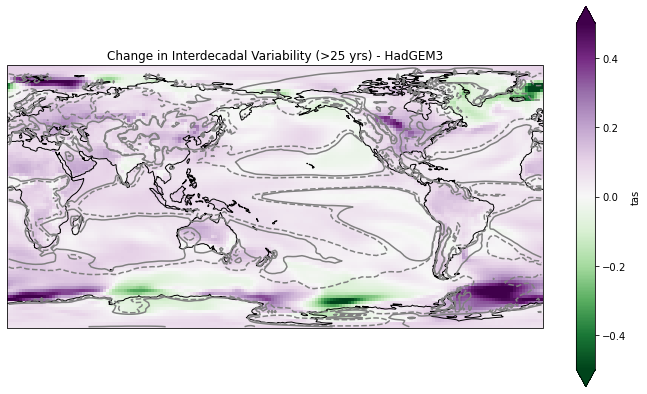

In [54]:
delta_hadgem = hadgem_hist - hadgem_control

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
delta_hadgem.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-0.5, vmax=0.5)
wap_hadgem.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.coastlines(color='black', linewidth=1)
plt.title('Change in Interdecadal Variability (>25 yrs) - HadGEM3')

Text(0.5, 1.0, 'Percent Change in Interdecadal Variability (>25 yrs) - HadGEM3')

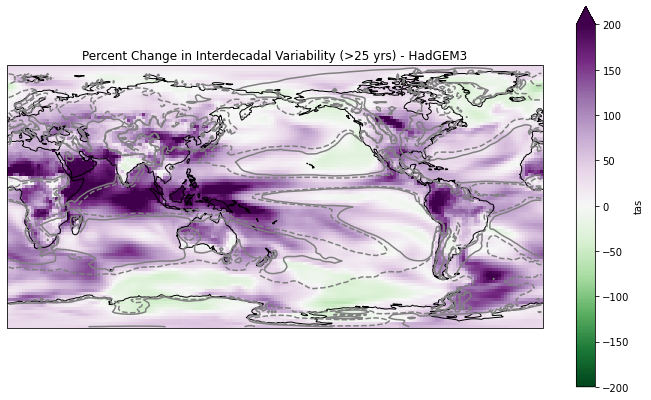

In [55]:
percent_hadgem = ((delta_hadgem)/hadgem_control)*100

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_hadgem.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-200, vmax=200)
wap_hadgem.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.coastlines(color='black', linewidth=1)
plt.title('Percent Change in Interdecadal Variability (>25 yrs) - HadGEM3')

Text(0, 0.5, 'Percentage Change in variability')

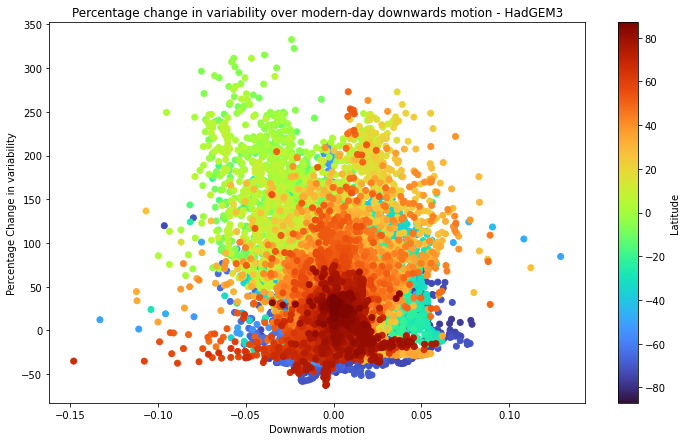

In [91]:
plt.scatter(wap_hadgem,percent_hadgem,c=colored_lats,cmap='turbo')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.title('Percentage change in variability over modern-day downwards motion - HadGEM3')
plt.xlabel('Downwards motion')
plt.ylabel('Percentage Change in variability')

(-0.1, 0.1)

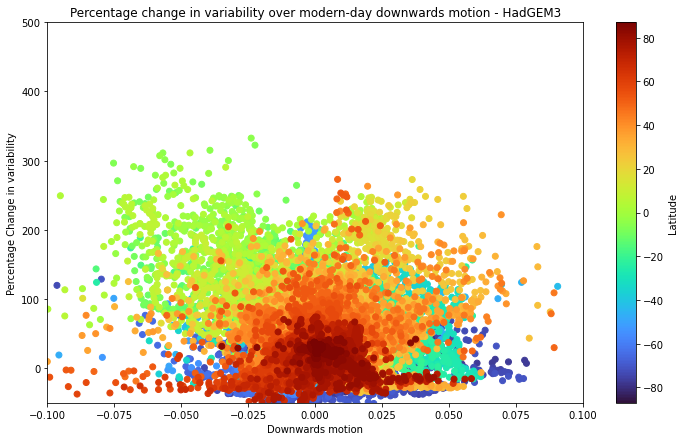

In [85]:
plt.scatter(wap_hadgem,percent_hadgem,c=colored_lats,cmap='turbo')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.title('Percentage change in variability over modern-day downwards motion - HadGEM3')
plt.xlabel('Downwards motion')
plt.ylabel('Percentage Change in variability')
plt.ylim([-50,500])
plt.xlim([-0.1,0.1])

# CESM2

In [57]:
path_cesm_control = cat.loc[(cat['variable_id']=='tas') &
               (cat['activity_id']=='CMIP') &
               (cat['frequency']=='mon') & 
               (cat['experiment_id'].str.contains('Control')) &
               (cat['source_id']=='CESM2') &
               (cat['variant_label']=='r1i1p1f1')]['path'].to_list()
path_cesm_control = path_cesm_control[0]
path_cesm_control

'/data/cristi/a/cristi/esm_data/cmip6/CESM2/piControl/r1i1p1f1/tas_Amon_CESM2_piControl_r1i1p1f1_gn_000101-009912.nc'

In [58]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

cesm_control_ds = xr.open_dataset(path_cesm_control)
cesm_control_rolling = cesm_control_ds.tas.interp(lat=new_lats,lon=new_lons).rolling(time=300, center=True).mean('time')
cesm_control = cesm_control_rolling.std('time')
cesm_control.load()

/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[0.25751518, 0.2565483 , 0.25519091, ..., 0.25959402, 0.25931593,
        0.25900662],
       [0.28212122, 0.28230069, 0.2813127 , ..., 0.27568962, 0.27810519,
        0.27998614],
       [0.28511184, 0.28748414, 0.28873915, ..., 0.27411665, 0.27696679,
        0.28007132],
       ...,
       [0.31526099, 0.30817712, 0.29964588, ..., 0.35540736, 0.34554799,
        0.33396619],
       [0.30249698, 0.29619892, 0.29196931, ..., 0.33113872, 0.322442  ,
        0.31513703],
       [0.29610672, 0.29367837, 0.29093278, ..., 0.30798448, 0.30465654,
        0.30088749]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Control Interdecadal Variability (>25 yrs) - CESM2')

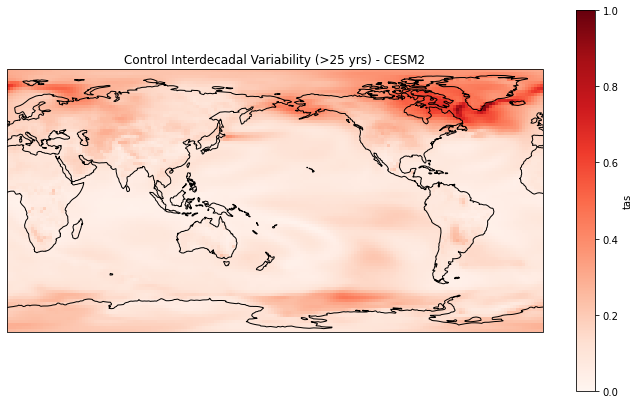

In [46]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cesm_control.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Interdecadal Variability (>25 yrs) - CESM2')

In [59]:
path_cesm_hist = cat.loc[(cat['variable_id']=='tas') &
               (cat['activity_id']=='CMIP') &
               (cat['frequency']=='mon') & 
               (cat['experiment_id']=='historical') &
               (cat['source_id']=='CESM2')].head(5)['path'].to_list()
path_cesm_hist = path_cesm_hist[0]
path_cesm_hist

'/data/cristi/a/cristi/esm_data/cmip6/CESM2/historical/r10i1p1f1/tas_Amon_CESM2_historical_r10i1p1f1_gn_185001-201412.nc'

In [60]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

cesm_hist_ds = xr.open_dataset(path_cesm_hist)
cesm_hist_rolling = cesm_hist_ds.tas.interp(lat=new_lats,lon=new_lons).rolling(time=300, center=True).mean('time')
cesm_hist = cesm_hist_rolling.std('time')
cesm_hist.load()

<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[0.35157332, 0.34783923, 0.34387512, ..., 0.36476726, 0.3616201 ,
        0.35836885],
       [0.38631283, 0.38072188, 0.37411729, ..., 0.40161713, 0.39859474,
        0.3948016 ],
       [0.4173271 , 0.41400136, 0.41000724, ..., 0.42929225, 0.42596236,
        0.42263842],
       ...,
       [0.9621378 , 0.96805308, 0.97369946, ..., 0.93238638, 0.9413038 ,
        0.94952619],
       [0.96790671, 0.97124475, 0.97362668, ..., 0.95378778, 0.9576496 ,
        0.96134299],
       [0.96248428, 0.96286674, 0.96327782, ..., 0.95882782, 0.95961784,
        0.96092991]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Historical Interdecadal Variability (>25 yrs) - CESM2')

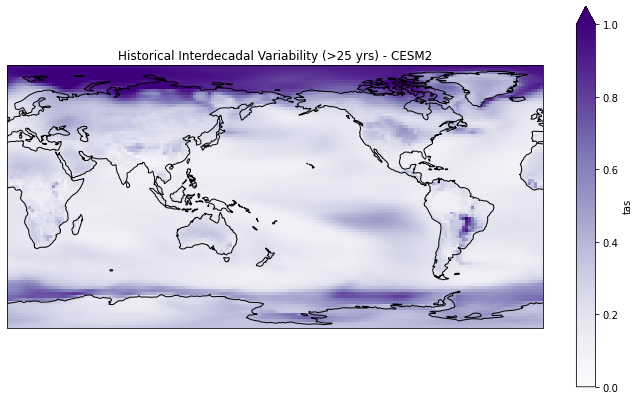

In [51]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cesm_hist.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', vmin=0, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Historical Interdecadal Variability (>25 yrs) - CESM2')

In [61]:
df_cesm_vert = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'wap' & experiment_id == 'historical' & source_id=='CESM2'")
df_cesm_vert.head() 

activity_id institution_id source_id experiment_id member_id table_id  \
59851        CMIP           NCAR     CESM2    historical  r1i1p1f1     Amon   
61663        CMIP           NCAR     CESM2    historical  r4i1p1f1     Amon   
61797        CMIP           NCAR     CESM2    historical  r5i1p1f1     Amon   
63149        CMIP           NCAR     CESM2    historical  r3i1p1f1     Amon   
63207        CMIP           NCAR     CESM2    historical  r6i1p1f1     Amon   

      variable_id grid_label  \
59851         wap         gn   
61663         wap         gn   
61797         wap         gn   
63149         wap         gn   
63207         wap         gn   

                                                  zstore  dcpp_init_year  \
59851  gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...             NaN   
61663  gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...             NaN   
61797  gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...             NaN   
63149  gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...             NaN   
63207  gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...             NaN   

        version  
59851  20190308  
61663  20190308  
61797  20190308  
63149  20190308  
63207  20190308

In [62]:
# Regridding
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

gcs = gcsfs.GCSFileSystem(token='anon')
zstore = df_cesm_vert.zstore.values[0]
mapper = gcs.get_mapper(zstore)
ds_wap_cesm = xr.open_zarr(mapper, consolidated=True)
slice_wap = ds_wap_cesm.wap.sel(time=slice('1976','2006')).sel(plev=50000,method='nearest').interp(lat=new_lats,lon=new_lons)
wap_cesm = slice_wap.mean('time')
wap_cesm.load()

<xarray.DataArray 'wap' (lat: 88, lon: 179)>
array([[ 0.00882148,  0.00857308,  0.0082384 , ...,  0.00911226,
         0.00910816,  0.00906956],
       [ 0.0181513 ,  0.01752792,  0.0169514 , ...,  0.02091613,
         0.0202296 ,  0.01950804],
       [ 0.0160645 ,  0.01596244,  0.01555204, ...,  0.0155988 ,
         0.01547519,  0.01573697],
       ...,
       [-0.00616122, -0.00588593, -0.00550985, ..., -0.00440363,
        -0.00530209, -0.0059632 ],
       [-0.00474501, -0.00488188, -0.00492508, ..., -0.00338487,
        -0.00377896, -0.00417801],
       [-0.00342508, -0.00349996, -0.0035613 , ..., -0.00305639,
        -0.00316162, -0.00325336]], dtype=float32)
Coordinates:
    plev     float64 5e+04
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Change in Interdecadal Variability (>25 yrs) - CESM2')

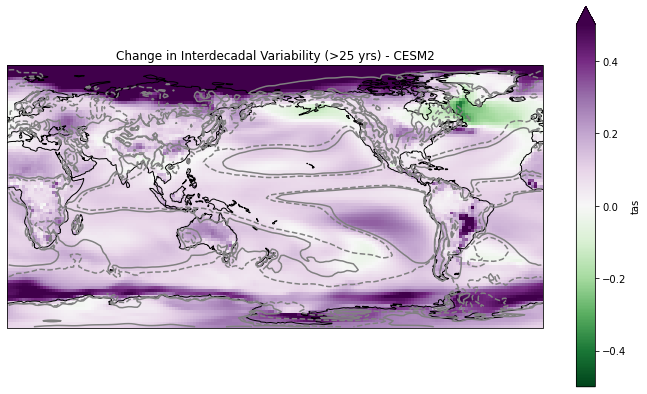

In [63]:
delta_cesm = cesm_hist - cesm_control

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
delta_cesm.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-0.5, vmax=0.5)
wap_cesm.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.coastlines(color='black', linewidth=1)
plt.title('Change in Interdecadal Variability (>25 yrs) - CESM2')

Text(0.5, 1.0, 'Percent Change in Interdecadal Variability (>25 yrs) - CESM2')

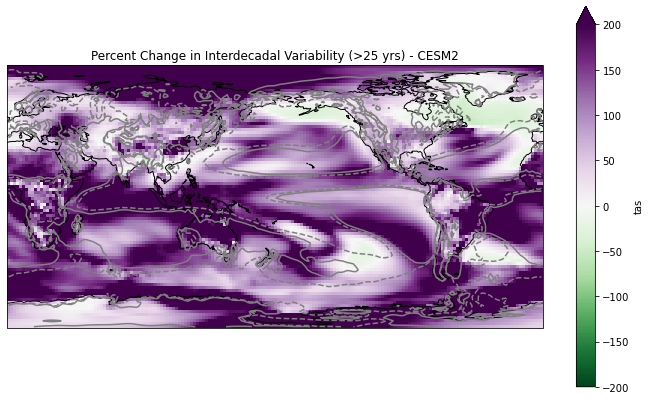

In [64]:
percent_cesm = ((delta_cesm)/cesm_control)*100

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_cesm.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-200, vmax=200)
wap_cesm.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.coastlines(color='black', linewidth=1)
plt.title('Percent Change in Interdecadal Variability (>25 yrs) - CESM2')

Text(0, 0.5, 'Percentage Change in variability')

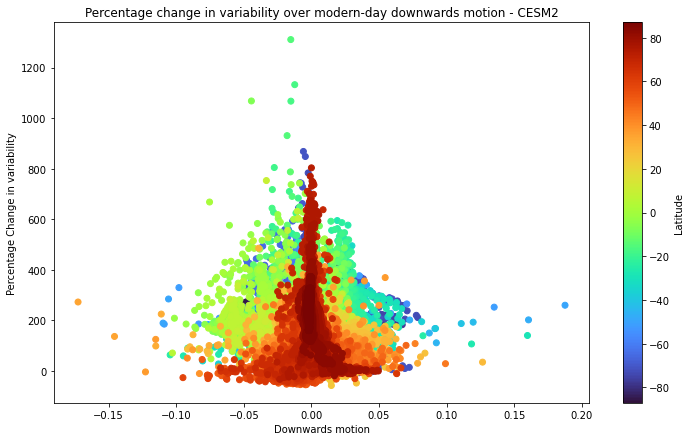

In [90]:
plt.scatter(wap_cesm,percent_cesm,c=colored_lats,cmap='turbo')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.title('Percentage change in variability over modern-day downwards motion - CESM2')
plt.xlabel('Downwards motion')
plt.ylabel('Percentage Change in variability')

(-0.1, 0.1)

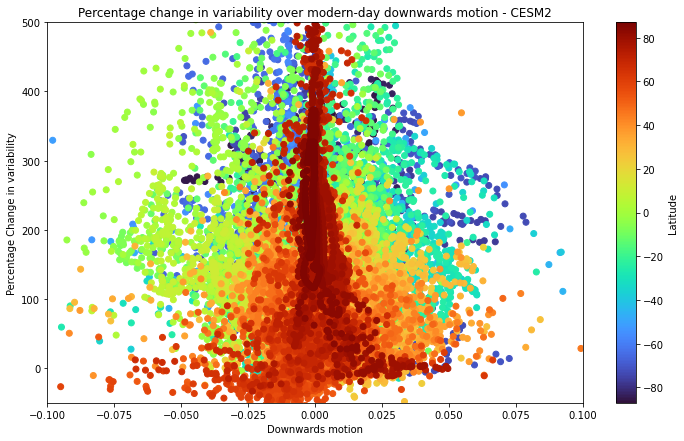

In [86]:
plt.scatter(wap_cesm,percent_cesm,c=colored_lats,cmap='turbo')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.title('Percentage change in variability over modern-day downwards motion - CESM2')
plt.xlabel('Downwards motion')
plt.ylabel('Percentage Change in variability')
plt.ylim([-50,500])
plt.xlim([-0.1,0.1])

# ACCESS-CM2

In [66]:
path_access_control = cat.loc[(cat['variable_id']=='tas') &
               (cat['activity_id']=='CMIP') &
               (cat['frequency']=='mon') & 
               (cat['experiment_id'].str.contains('Control')) &
               (cat['source_id']=='ACCESS-CM2') &
               (cat['variant_label']=='r1i1p1f1')]['path'].to_list()
path_access_control = path_access_control[0]
path_access_control

'/data/cristi/a/cristi/esm_data/cmip6/ACCESS-CM2/piControl/r1i1p1f1/tas_Amon_ACCESS-CM2_piControl_r1i1p1f1_gn_095001-144912.nc'

In [67]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

access_control_ds = xr.open_dataset(path_access_control)
access_control_rolling = access_control_ds.tas.interp(lat=new_lats,lon=new_lons).rolling(time=300, center=True).mean('time')
access_control = access_control_rolling.std('time')
access_control.load()

/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/coding/times.py:688: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[0.23995398, 0.2412176 , 0.2420347 , ..., 0.23246196, 0.23432461,
        0.23600783],
       [0.23121266, 0.23263527, 0.23317024, ..., 0.23045024, 0.23112851,
        0.23117936],
       [0.21463773, 0.21410196, 0.21423429, ..., 0.21358639, 0.21341098,
        0.21366955],
       ...,
       [0.34680432, 0.3606831 , 0.37482551, ..., 0.30515007, 0.31347123,
        0.32257934],
       [0.28697665, 0.29229187, 0.29843367, ..., 0.27399553, 0.276551  ,
        0.27931914],
       [0.26992934, 0.27147501, 0.27291905, ..., 0.2673147 , 0.2680277 ,
        0.2686417 ]])
Coordinates:
    height   float64 2.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Control Interdecadal Variability (>25 yrs) - CESM2')

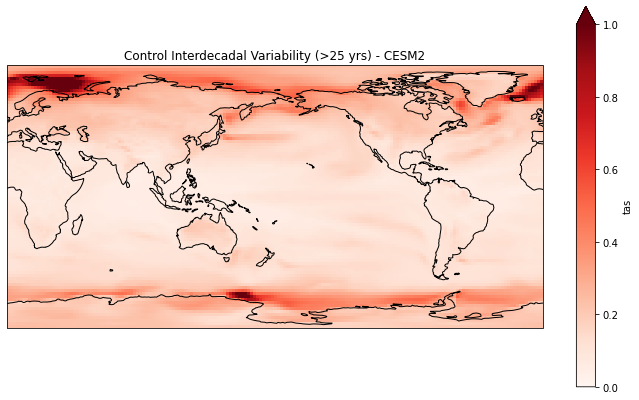

In [6]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
access_control.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Interdecadal Variability (>25 yrs) - ACCESS-CM2')

In [68]:
path_access_hist = cat.loc[(cat['variable_id']=='tas') &
               (cat['activity_id']=='CMIP') &
               (cat['frequency']=='mon') & 
               (cat['experiment_id']=='historical') &
               (cat['source_id']=='ACCESS-CM2')].head(5)['path'].to_list()
path_access_hist = path_access_hist[0]
path_access_hist

'/data/cristi/a/cristi/esm_data/cmip6/ACCESS-CM2/historical/r1i1p1f1/tas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'

In [69]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

access_hist_ds = xr.open_dataset(path_access_hist)
access_hist_rolling = access_hist_ds.tas.interp(lat=new_lats,lon=new_lons).rolling(time=300, center=True).mean('time')
access_hist = access_hist_rolling.std('time')
access_hist.load()

<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[0.40127718, 0.40264204, 0.40308577, ..., 0.38591246, 0.38900126,
        0.39159274],
       [0.35789035, 0.35841349, 0.35863339, ..., 0.3578244 , 0.35888006,
        0.35868129],
       [0.3593578 , 0.35496526, 0.35035853, ..., 0.36401019, 0.36365726,
        0.3633797 ],
       ...,
       [0.53770973, 0.55026513, 0.56385401, ..., 0.4803343 , 0.49387419,
        0.50900267],
       [0.46008108, 0.46407017, 0.46832681, ..., 0.44303209, 0.44561443,
        0.44935094],
       [0.39643165, 0.39771919, 0.39908155, ..., 0.39254368, 0.39277715,
        0.39429297]])
Coordinates:
    height   float64 2.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Historical Interdecadal Variability (>25 yrs) - ACCESS-CM2')

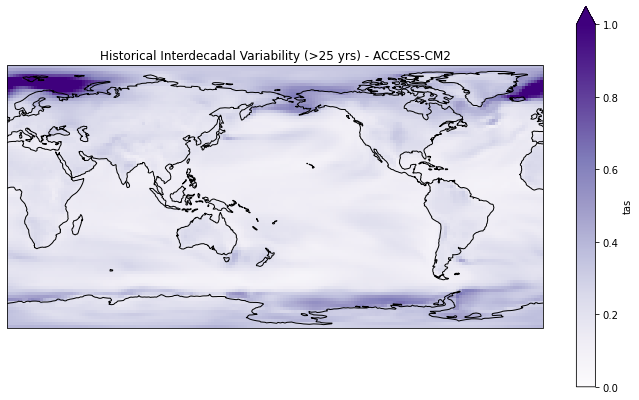

In [9]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
access_hist.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', vmin=0, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Historical Interdecadal Variability (>25 yrs) - ACCESS-CM2')

In [71]:
df_access_vert = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'wap' & experiment_id == 'historical' & source_id=='ACCESS-CM2'")
df_access_vert.head() 

activity_id institution_id   source_id experiment_id member_id  \
378944        CMIP   CSIRO-ARCCSS  ACCESS-CM2    historical  r1i1p1f1   
391361        CMIP   CSIRO-ARCCSS  ACCESS-CM2    historical  r2i1p1f1   
425283        CMIP   CSIRO-ARCCSS  ACCESS-CM2    historical  r3i1p1f1   
521275        CMIP   CSIRO-ARCCSS  ACCESS-CM2    historical  r5i1p1f1   
521294        CMIP   CSIRO-ARCCSS  ACCESS-CM2    historical  r4i1p1f1   

       table_id variable_id grid_label  \
378944     Amon         wap         gn   
391361     Amon         wap         gn   
425283     Amon         wap         gn   
521275     Amon         wap         gn   
521294     Amon         wap         gn   

                                                   zstore  dcpp_init_year  \
378944  gs://cmip6/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/...             NaN   
391361  gs://cmip6/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/...             NaN   
425283  gs://cmip6/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/...             NaN   
521275  gs://cmip6/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/...             NaN   
521294  gs://cmip6/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/...             NaN   

         version  
378944  20191108  
391361  20191125  
425283  20200306  
521275  20210607  
521294  20210607

In [72]:
# Regridding
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

gcs = gcsfs.GCSFileSystem(token='anon')
zstore = df_access_vert.zstore.values[0]
mapper = gcs.get_mapper(zstore)
ds_wap_access = xr.open_zarr(mapper, consolidated=True)
slice_wap = ds_wap_access.wap.sel(time=slice('1976','2006')).sel(plev=50000,method='nearest').interp(lat=new_lats,lon=new_lons)
wap_access = slice_wap.mean('time')
wap_access.load()

<xarray.DataArray 'wap' (lat: 88, lon: 179)>
array([[ 0.01249795,  0.01317266,  0.01292327, ...,  0.01657859,
         0.01565585,  0.01522209],
       [ 0.01842623,  0.01626463,  0.01556598, ...,  0.01766516,
         0.01842282,  0.01822556],
       [ 0.01495233,  0.0146656 ,  0.01379723, ...,  0.02074713,
         0.01917905,  0.01785858],
       ...,
       [-0.0033089 , -0.00312043, -0.00284495, ..., -0.00337584,
        -0.00373346, -0.00352168],
       [-0.00073756, -0.00073745, -0.00070109, ..., -0.00056426,
        -0.00065441, -0.0007091 ],
       [ 0.00073096,  0.00072374,  0.00071922, ...,  0.00078912,
         0.00075956,  0.00074515]], dtype=float32)
Coordinates:
    plev     float64 5e+04
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Change in Interdecadal Variability (>25 yrs) - ACCESS-CM2')

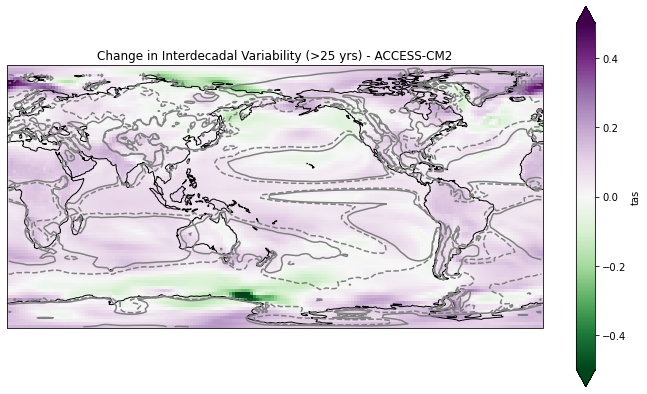

In [73]:
delta_access = access_hist - access_control

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
delta_access.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-0.5, vmax=0.5)
wap_access.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.coastlines(color='black', linewidth=1)
plt.title('Change in Interdecadal Variability (>25 yrs) - ACCESS-CM2')

Text(0.5, 1.0, 'Percent Change in Interdecadal Variability (>25 yrs) - ACCESS-CM2')

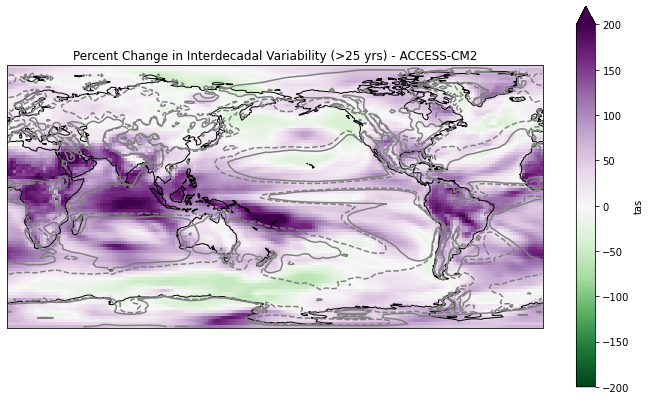

In [74]:
percent_access = ((delta_access)/access_control)*100

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_access.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-200, vmax=200)
wap_access.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.coastlines(color='black', linewidth=1)
plt.title('Percent Change in Interdecadal Variability (>25 yrs) - ACCESS-CM2')

Text(0, 0.5, 'Percentage Change in variability')

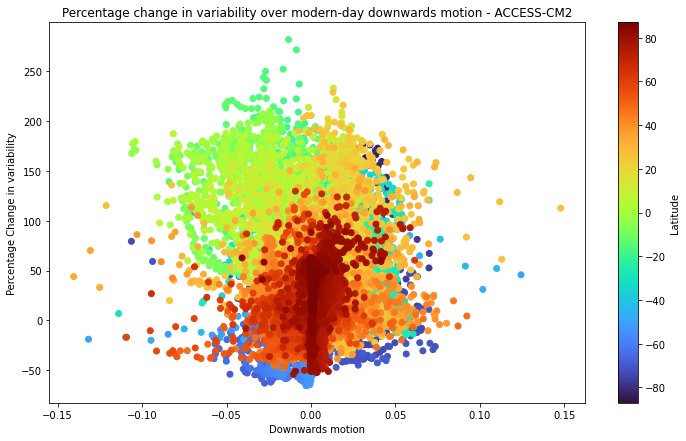

In [88]:
plt.scatter(wap_access,percent_access,c=colored_lats,cmap='turbo')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.title('Percentage change in variability over modern-day downwards motion - ACCESS-CM2')
plt.xlabel('Downwards motion')
plt.ylabel('Percentage Change in variability')

(-50.0, 500.0)

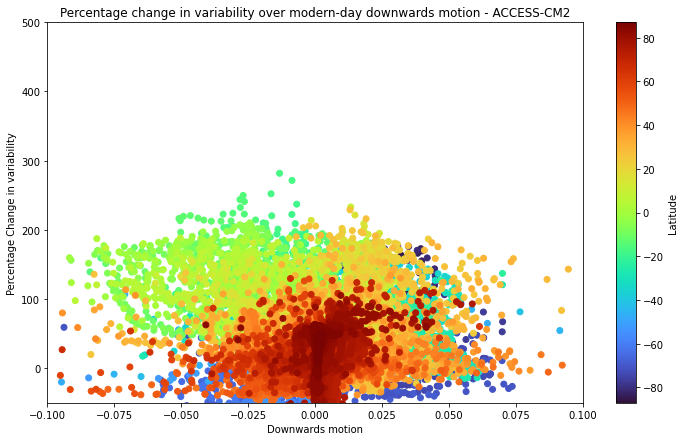

In [89]:
plt.scatter(wap_access,percent_access,c=colored_lats,cmap='turbo')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.title('Percentage change in variability over modern-day downwards motion - ACCESS-CM2')
plt.xlabel('Downwards motion')
plt.ylabel('Percentage Change in variability')
plt.xlim([-0.1,0.1])
plt.ylim([-50,500])